In [3]:
import pandas as pd 

# Read dataset using read_csv()
news_df=pd.read_csv('news.csv')
news_df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
print(news_df.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [6]:
news_df=news_df.drop(columns=news_df.columns[0],axis=1)
print(news_df)

                                                  title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) N

In [7]:
news_df['contents']=news_df['title'] +' '+ news_df['text']
news_df

,title,text,label,contents
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se..."


In [8]:
X=news_df['contents']
print(X)

0       You Can Smell Hillary’s Fear Daniel Greenfield...
1       Watch The Exact Moment Paul Ryan Committed Pol...
2       Kerry to go to Paris in gesture of sympathy U....
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: contents, Length: 6335, dtype: object


In [9]:
news_df['label'] = news_df['label'].apply(lambda x: 1 if x=='FAKE' else 0)
y = news_df['label']
y


0       1
1       1
2       0
3       1
4       0
       ..
6330    0
6331    1
6332    1
6333    0
6334    0
Name: label, Length: 6335, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.15,stratify=y, random_state=10)

<Axes: xlabel='label', ylabel='count'>

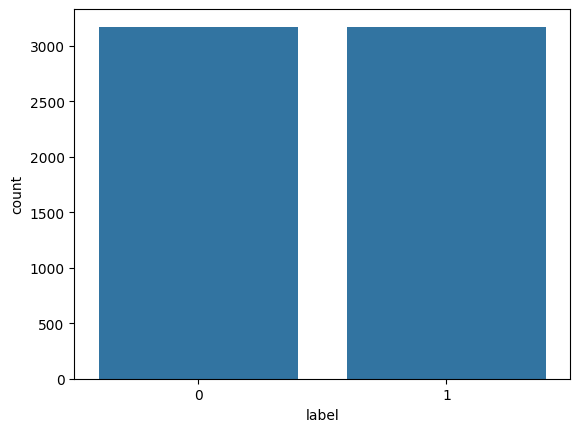

In [11]:
import seaborn as sns

sns.countplot(x = news_df['label'])


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [13]:
vect= CountVectorizer(stop_words='english',max_features=50)
xtrain_count = vect.fit_transform(xtrain)
xtest_count = vect.transform(xtest)

In [14]:
tf_idf_vect = TfidfVectorizer(stop_words='english',max_features=1000)
xtrain_tf = tf_idf_vect.fit_transform(xtrain)
xtest_tf = tf_idf_vect.transform(xtest)

In [15]:
import scipy.sparse as sp
train_data = sp.hstack((xtrain_count,xtrain_tf))
test_data = sp.hstack((xtest_count,xtest_tf))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,auc,roc_curve



In [17]:
models = {'Logistic Regression':LogisticRegression(), 
         'Support Vector Classifier':SVC(),'Decision Tree':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier(),'Neural Network':MLPClassifier()}

for model_name, model in models.items():
    start_time = datetime.now() 
    pipe = Pipeline([('model', model)])
    pipe.fit(train_data ,ytrain)
    end_time = datetime.now() 
    prediction = pipe.predict(test_data)
    print("\n \n *****{}*****        ".format(model_name))
    print('Accuracy Score : {} '.format(accuracy_score(prediction,ytest)))
    print('Confusion Matrix \n\n  ',confusion_matrix(prediction,ytest))
    print('\n Classification Report \n ')
    print(classification_report(prediction,ytest))
    time_difference = (end_time - start_time).total_seconds() * 10**3
    print("Execution time is: ", time_difference, "ms")


c:\Users\vidhy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 
 *****Logistic Regression*****        
Accuracy Score : 0.8937960042060988 
Confusion Matrix 

   [[420  45]
 [ 56 430]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       465
           1       0.91      0.88      0.89       486

    accuracy                           0.89       951
   macro avg       0.89      0.89      0.89       951
weighted avg       0.89      0.89      0.89       951

Execution time is:  234.47299999999998 ms

 
 *****Support Vector Classifier*****        
Accuracy Score : 0.8317560462670873 
Confusion Matrix 

   [[374  58]
 [102 417]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       432
           1       0.88      0.80      0.84       519

    accuracy                           0.83       951
   macro avg       0.83      0.83      0.83       951
weighted avg       0.84      0.83      0.83       9

In [18]:
mlp_model = MLPClassifier()
mlp_model.fit(train_data, ytrain)

# Predictions on the test set
y_pred = mlp_model.predict(test_data)

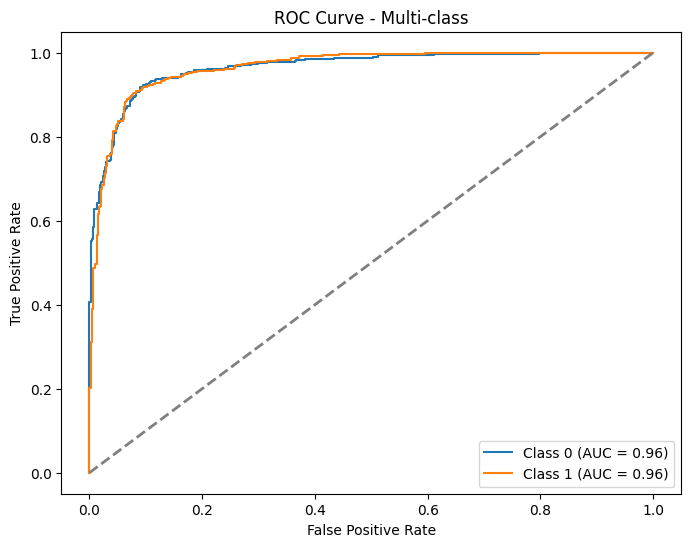

In [20]:
import matplotlib.pyplot as plt
classes = mlp_model.classes_

n_classes = len(classes)
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    class_label = classes[i]
    y_score = mlp_model.predict_proba(test_data)[:, i]
    fpr, tpr, _ = roc_curve(ytest, y_score, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class')
plt.legend(loc="lower right")
plt.show()

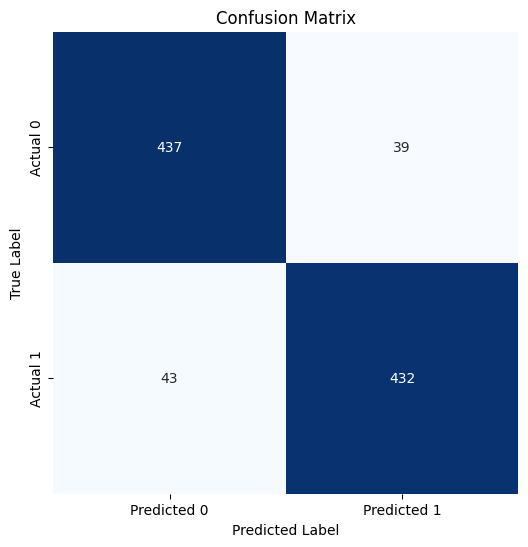

In [21]:
# Confusion Matrix
y_pred = mlp_model.predict(test_data)
conf_matrix = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [32]:
#Prediction
new_input=['First, the headline number: A new Washington Post/ABC News poll shows that 53 percent of Americans have an unfavorable view of Clinton, an 8 percentage point increase since July. Her favorable rating has declined by 7 percentage points to 45 percent over the same period of time, and the split among registered voters is even worse for her, at 56 percent unfavorable to 43 percent favorable. A majority of women (51 percent) now view her unfavorably. None of that is good news for Clinton. Shes been on a pretty steady drop from the moment she left the State Department in early 2013. That was a foreseeable outcome of Clinton moving back into domestic partisan politics after four years of representing Americas interests abroad. Ellen Tauscher, a former member of Congress and undersecretary of state, warned Clinton that would happen in a private conversation about Clintons political future in September 2011, when about two-thirds of Americans rated her favorably. But whats apparent â€” and of more immediate interest to Clinton â€” is that shes still better regarded among Democrats than Vice President Joe Biden, who is still weighing whether to run against her. Bidens dead-even 46 percent to 46 percent favorable/unfavorable rating is better than Clinton but the edge is based on him having higher numbers with Republicans and independents, the vast majority of whom wont vote in the Democratic primaries.A full 80 percent of Democrats view Clinton favorably, compared with 70 percent who feel that way about Biden. Her number among African Americans is 79 percent, and its 68 percent among Hispanics. By comparison, Biden is viewed favorably by just 67 percent of African Americans and 49 percent of Hispanics. That helps explain why Clinton is blowing her Democratic competition out of the water in national horse-race polls. She was up 35 percentage points in a head-to-head matchup with Vermont Sen. Bernie Sanders in a PPP poll conducted August 28 to 30 and held a 45-22-18 lead over Sanders and Biden in a Quinnipiac survey conducted from August 20 to 25. Shes also doing much better on the favorability scale than either Republican frontrunner Donald Trump or former Florida Gov. Jeb Bush. Trump checked in with a favorable number that has risen to 37 percent, about the same as Bushs 38 percent. Trump had an unfavorable score of 59 percent, while Bush was at 55 percent. The Clinton ship has taken on water. But, along with other recent surveys, this poll tell us that Clinton is still running away with her partys nomination and remains in better position than any of her Republican or Democratic rivals to advance to the all-important second round of the presidential race. For someone who lost the 2008 primary in part because she looked ahead to the general election, it makes sense to focus on winning the primary first in 2016. On that score, shes still in great shape.']
input_vect_count=vect.transform(new_input)
input_tfidf=tf_idf_vect.transform(new_input)
new_df=sp.hstack((input_vect_count,input_tfidf))

In [35]:
predicted=mlp_model.predict(new_df)
print(predicted)
class_labels=['REAL','FAKE']
predicted_labels = [class_labels[prediction] for prediction in predicted]

print(predicted_labels)

[0]
['REAL']
